In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import roc_auc_score

In [210]:
daten = pd.read_hdf('data.hdf5', key='Daten')
daten.shape

(40000, 189)

**Daten zu features (x) und Targetvektor (y) aufteilen**


In [211]:
x = daten.iloc[:,:daten.shape[1]-3]
y = daten['type'].values


Da die Features auf unterschiedlichen Skalen sind, müssen sie skaliert werden

In [ ]:
# Noch andere Skaler ausprobieren...
scaler = StandardScaler()
x = scaler.fit_transform(x)

**Definition der verschiedenen Featureanzahlen k** <br>
Danach werden alle Schritte für jedes k durch geführt. Deshalb ist um alles eine while-Schlife rum, die alle k-Werte durchläuft

In [228]:
k = np.arange(20, 150, 10)

**Forward Selection mit SelectKBest** <br>
Scorefunction ist standartisiert der T-Wert

In [247]:
x_sel = []
for i in k:
    sel = SelectKBest(k=i) 
    x_sel.append(sel.fit_transform(x, y))
    

/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [ 16  17  18  20  31  33  35  44  45  47  60  62  64  72  73  74  76  88
  92  95 103 105 107 115 116 117 119 156 157 159 168 169 171 179 180 182] are constant.
  UserWarning)
/home/miriam/.local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/home/

**Außerdem Teilen in Trainings- und Testdatensatz**

In [251]:
x_train = []
y_train = []
x_test = []
y_test = []

i = 0
while i < len(k):
    train_x, test_x, train_y, test_y = train_test_split(x_sel[i],y, test_size = 0.3, random_state = 42, stratify = y)
    x_train.append(train_x)
    y_train.append(train_y)
    x_test.append(test_x)
    y_test.append(test_y)
    i = i+1
    

**Random-Forest-Lerner**

In [239]:
RF = RandomForestClassifier(100)

y_pred_RF = [] #Vorhergesagten Klassen
accuracy_RF = [] #Reinheit
efficiency_RF = [] #Effizienz
jaccard_RF = [] #Jaccard-Index
roc_auc_RF = [] #Fläche unter ROC-Kurve

In [241]:
i = 0

while i < len(k):   
    #Lerner
    RF.fit(x_train[i], y_train[i])
    predict = RF.predict(x_test[i])
    y_pred_RF.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_RF.append(accuracy_score(y_test[i], y_pred_RF[i]))
    efficiency_RF.append(precision_score(y_test[i], y_pred_RF[i]))
    jaccard_RF.append(jaccard_similarity_score(y_test[i], y_pred_RF[i], normalize = True))
    roc_auc_RF.append(roc_auc_score(y_test[i], y_pred_RF[i]))
    
    i = i+1

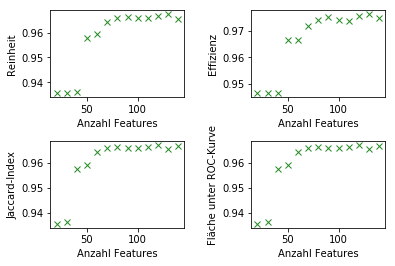

In [265]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_RF[:-1], marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_RF[:-1], marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_RF, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

In [269]:
# Nur für das Beste?
#HIER LÄUFT NOCH WAS SCHIEF: Nur drei Werte berechnet

#roc_x, roc_y, tresh = roc_curve(y_test, y_pred)
#plt.plot(roc_x, roc_y, color = 'forestgreen')
#plt.xlabel(r'P(FP)')
#plt.ylabel(r'P(TP)')

In [270]:
#Nur für das Beste? -> Ist nicht unbedingt nötig....?

#nn_out = pd.DataFrame()
#nn_out = nn_out.assign(prediction = y_pred.ravel())
#nn_out = nn_out.assign(target = y_test)
#nn_out.groupby("target")["prediction"].plot(kind='kde', figsize=(10, 10))
#plt.legend([r'Background', r'Signal'], loc='upper left')
#plt.ylabel(r'events')
#plt.xlabel(r'Klasse')

**kNN-Klassifikator**

In [266]:
kNN = KNeighborsClassifier(10)

y_pred_kNN = [] #Vorhergesagten Klassen
accuracy_kNN = [] #Reinheit
efficiency_kNN = [] #Effizienz
jaccard_kNN = [] #Jaccard-Index
roc_auc_kNN = [] #Fläche unter ROC-Kurve

In [268]:
i = 0

while i < len(k):   
    #Lerner
    kNN.fit(x_train[i], y_train[i])
    predict = kNN.predict(x_test[i])
    y_pred_kNN.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_kNN.append(accuracy_score(y_test[i], y_pred_kNN[i]))
    efficiency_kNN.append(precision_score(y_test[i], y_pred_kNN[i]))
    jaccard_kNN.append(jaccard_similarity_score(y_test[i], y_pred_kNN[i], normalize = True))
    roc_auc_kNN.append(roc_auc_score(y_test[i], y_pred_kNN[i]))
    
    i = i+1

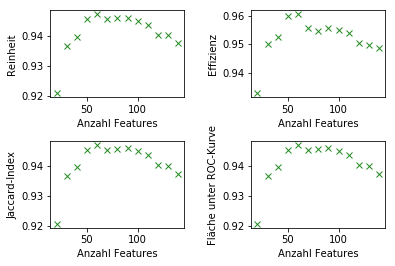

In [273]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_kNN, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

In [271]:
#roc_x, roc_y, tresh = roc_curve(y_test, y_pred)
#plt.plot(roc_x, roc_y, color = 'forestgreen')
#plt.xlabel(r'P(FP)')
#plt.ylabel(r'P(TP)')

In [272]:
#nn_out = pd.DataFrame()
#nn_out = nn_out.assign(prediction = y_pred.ravel())
#nn_out = nn_out.assign(target = y_test)
#nn_out.groupby("target")["prediction"].plot(kind='kde', figsize=(10, 10))
#plt.legend([r'Background', r'Signal'], loc='upper left')
#plt.ylabel(r'events')
#plt.xlabel(r'Klasse')

**Naive-Bayes-Lerner**

In [276]:
NB = GaussianNB()

y_pred_NB = [] #Vorhergesagten Klassen
accuracy_NB = [] #Reinheit
efficiency_NB = [] #Effizienz
jaccard_NB = [] #Jaccard-Index
roc_auc_NB = [] #Fläche unter ROC-Kurve

In [277]:
i = 0

while i < len(k):   
    #Lerner
    NB.fit(x_train[i], y_train[i])
    predict = NB.predict(x_test[i])
    y_pred_NB.append(predict)
    
    #Berechnung und speichern der Qualitätsparameter
    accuracy_NB.append(accuracy_score(y_test[i], y_pred_NB[i]))
    efficiency_NB.append(precision_score(y_test[i], y_pred_NB[i]))
    jaccard_NB.append(jaccard_similarity_score(y_test[i], y_pred_NB[i], normalize = True))
    roc_auc_NB.append(roc_auc_score(y_test[i], y_pred_NB[i]))
    
    i = i+1

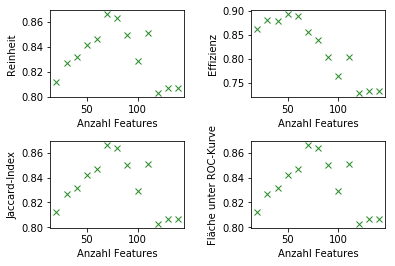

In [278]:
plt.subplot(2,2,1)
plt.plot(k, accuracy_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Reinheit')

plt.subplot(2,2,2)
plt.plot(k, efficiency_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Effizienz')

plt.subplot(2,2,3)
plt.plot(k, jaccard_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Jaccard-Index')

plt.subplot(2,2,4)
plt.plot(k, roc_auc_NB, marker = 'x', linestyle = '', color = 'forestgreen')
plt.xlabel(r'Anzahl Features')
plt.ylabel(r'Fläche unter ROC-Kurve')

plt.subplots_adjust(wspace = 0.5, hspace = 0.5)

In [275]:
#roc_x, roc_y, _ = roc_curve(y_test, y_pred.ravel(), pos_label=1)
#print(y_test)
#plt.plot(roc_x, roc_y, color = 'forestgreen')
#plt.xlabel(r'P(FP)')
#plt.ylabel(r'P(TP)')

In [274]:
#nn_out = pd.DataFrame()
#nn_out = nn_out.assign(prediction = y_pred.ravel())
#nn_out = nn_out.assign(target = y_test)
#nn_out.groupby("target")["prediction"].plot(kind='kde', figsize=(10, 10))
#plt.legend([r'Background', r'Signal'], loc='upper left')
#plt.ylabel(r'events')
#plt.xlabel(r'Klasse')